# Processamento dos Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import import_ipynb

## POSCOMP

### Dados da Homologação do POSCOMP

In [3]:
dados_homologados = pd.read_csv('dados/homologacao_poscomp/dados_homologados.csv')

In [4]:
dados_homologados.head()

,INSCRICAO,SEXO,ESTADO,ANO
0,39401673171-6,M,OU,2016
1,39401645886-1,M,CE,2016
2,39401663587-8,M,RS,2016
3,39401651770-6,M,SP,2016
4,39401671273-0,M,PA,2016


In [5]:
# elimina dados pertecentes ao Peru
dados_homologados = dados_homologados.loc[(dados_homologados['ESTADO']) != 'OU']

In [6]:
# ano = [2016,2017,2018,2019]
# dados_homologados.groupby('CARGO')['ANO'].value_counts().unstack(0).loc[ano].plot.bar()

<AxesSubplot: xlabel='ANO'>

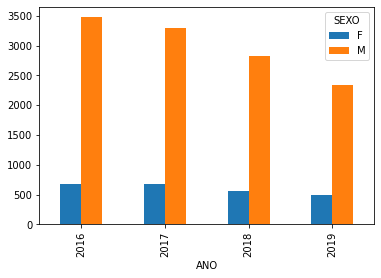

In [7]:
ano = [2016,2017,2018,2019]
dados_homologados.groupby('SEXO')['ANO'].value_counts().unstack(0).loc[ano].plot.bar()

<AxesSubplot: >

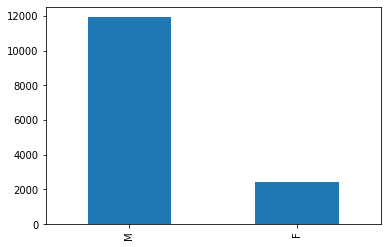

In [8]:
dados_homologados['SEXO'].value_counts().plot.bar()

In [9]:
dados_homologados = dados_homologados.set_index('INSCRICAO')

In [10]:
dados_homologados.drop(['688145', 'miamia'], inplace=True)

### Dados das Notas do POSCOMP

In [11]:
from textwrap import wrap

In [12]:
dados_notasRespostas = pd.read_csv('dados/notas_poscomp/dados_notasRespostas.csv')

In [13]:
dados_notasRespostas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64246 entries, 0 to 64245
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   INSCRICAO                                        64246 non-null  object 
 1   ESPECIALIDADE                                    63372 non-null  object 
 2   PRESENTE DIA1                                    64246 non-null  object 
 3   CARGO                                            64246 non-null  object 
 4   Matemática Discreta                              52328 non-null  float64
 5   Cálculo Diferencial e Integral                   52328 non-null  float64
 6   Álgebra Linear                                   52328 non-null  float64
 7   Geometria Analítica                              52328 non-null  float64
 8   Análise Combinatória                             52328 non-null  float64
 9   Probabilidade e Estatística 

In [14]:
dados_notasRespostas['ESPECIALIDADE'] = dados_notasRespostas['ESPECIALIDADE'].str.lower()

In [15]:
dados_notasRespostas.head()

,INSCRICAO,ESPECIALIDADE,PRESENTE DIA1,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,Probabilidade e Estatística,...,Arquitetura e Organização de Computadores,Redes de Computadores,Computação Gráfica,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,ANO
0,39401673171-6,inteligência artificial,S,Mestrado/Doutorado,3.0,3.0,3.0,1.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0,2016
1,39401673171-6,linhas de produto de software,S,Mestrado/Doutorado,3.0,3.0,3.0,1.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0,2016
2,39401673171-6,"computação gráfica, processamento de imagens, ...",S,Mestrado/Doutorado,3.0,3.0,3.0,1.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0,2016
3,39401673171-6,inteligência computacional,S,Mestrado/Doutorado,3.0,3.0,3.0,1.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0,2016
4,39401673171-6,inteligência artificial,S,Mestrado/Doutorado,3.0,3.0,3.0,1.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0,2016


In [16]:
#dados_candidatosNotas = dados_notasRespostas.loc[~dados_notasRespostas['INSCRICAO'].
                                                    #isin(dados_homologadosPA['INSCRICAO'])].reset_index(drop=True)

In [17]:
dados = (dados_notasRespostas['PRESENTE DIA1'] == 'S') & (dados_notasRespostas['CARGO'] == 'Mestrado/Doutorado')

In [18]:
dados_world = dados_notasRespostas[dados]

In [19]:
dados_world['ESPECIALIDADE'].value_counts(ascending=False)

engenharia de software              3681
inteligência computacional          3243
inteligência artificial             2314
sistemas de computação              1960
sistemas de informação              1354
                                    ... 
middleware adaptativo                  1
visualização volumétrica               1
lógica nebulosa                        1
teoria, lógica e métodos formais       1
contratos eletrônicos                  1
Name: ESPECIALIDADE, Length: 750, dtype: int64

In [20]:
especialidades_alt = {'redes de computadores\xa0\xa0': 'redes de computadores',
         'inteligência computacional\xa0\xa0': 'inteligência computacional',
        'modelos\xa0neurais artificiais': 'modelos neurais artificiais',
         'engenharia de\xa0sistemas\xa0computacionais': 'engenharia de sistemas computacionais',
         'verificação e \xa0validação': 'verificação e validação',
        }
dados_world = dados_world.replace({'ESPECIALIDADE': especialidades_alt})

In [21]:
dados_world['ESPECIALIDADE'].sort_values().value_counts()

engenharia de software                                          3681
inteligência computacional                                      3421
inteligência artificial                                         2314
sistemas de computação                                          1960
sistemas de informação                                          1354
                                                                ... 
cooperação e recuperação de informações multidimensionais          1
desenvolvimento de software distribuído                            1
desenvolvimento dirigido a modelos                                 1
modelagem lógica do raciocínio                                     1
relação entre formação, qualificação e inovação nas empresas       1
Name: ESPECIALIDADE, Length: 747, dtype: int64

In [2]:
# Libraries
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Create a list of word
text = dados_world['ESPECIALIDADE'].tolist()


# Create the wordcloud object
wordcloud2 = WordCloud(width=3000, height=2000, 
                       background_color="white", 
                       random_state=1, 
                       min_word_length=2).generate(','.join(dados_world['ESPECIALIDADE']))
# WordCloud.generate_from_frequencies

# Display the generated image:
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('imagens/nuvem_palavras.png', format='png', dpi = 300, bbox_inches='tight')
plt.show()

NameError: name 'dados_world' is not defined

In [23]:
# #Metodo para geração de palavras
# def generate_word_cloud(researcher):
#     fig1, ax1 = plt.subplots()
#     portuguese_stop_words = list(nltk.corpus.stopwords.words('portuguese'))
#     english_stop_words = list(wordcloud.STOPWORDS)
#     stop_words = portuguese_stop_words + english_stop_words
#     word_cloud = WordCloud(
#         width=3000,
#         height=2000,
#         random_state=1,
#         background_color="salmon",
#         colormap="Pastel1",
#         collocations=False,
#         stopwords=stop_words,
#         min_word_length=2
#     ).generate(researcher.words)

#     plt.title('Nuvem de Palavra de todos os Trabalhos e Artigos')
#     plt.imshow(word_cloud)
#     plt.axis("off")

#     return fig1

### Realizar estudos por Regiões do Brasil

In [24]:
dados_homologados_cp = dados_homologados.copy()

In [25]:
dados_homologados['ESTADO'].unique()

array(['CE', 'RS', 'SP', 'PA', 'MT', 'AM', 'MS', 'PB', 'GO', 'RN', 'PR',
       'MG', 'SE', 'PE', 'ES', 'BA', 'RJ', 'AL', 'SC', 'MA', 'PI', 'DF',
       'RO', 'TO', 'RR', 'AP', 'AC'], dtype=object)

In [26]:
import services.lista_estados_regioes as lesr

importing Jupyter notebook from C:\Users\jeanc\Documentos\Projeto de pesquisa mestrado\project_dataScience_POSCOMP\services\lista_estados_regioes.ipynb


In [27]:
#Aqui estou adicionando as regioes dos estados brasileiros
for i in lesr.regioes_brasil_siglas:
    dados_homologados_cp.loc[dados_homologados_cp['ESTADO'].isin(lesr.regioes_brasil_siglas[i]), 'REGIAO'] = i

In [28]:
dados_homologados_cp1 = dados_homologados_cp.dropna()

In [29]:
dados_homologados_cp1

,SEXO,ESTADO,ANO,REGIAO
INSCRICAO,,,,
39401645886-1,M,CE,2016,nordeste
39401663587-8,M,RS,2016,sul
39401651770-6,M,SP,2016,sudeste
39401671273-0,M,PA,2016,norte
39402640298-8,M,MT,2016,centro_oeste
...,...,...,...,...
51801394300-3,M,SP,2019,sudeste
51801396055-5,M,ES,2019,sudeste
51801354647-6,M,RS,2019,sul


In [30]:
grupo_regiao = dados_homologados_cp.groupby('REGIAO')

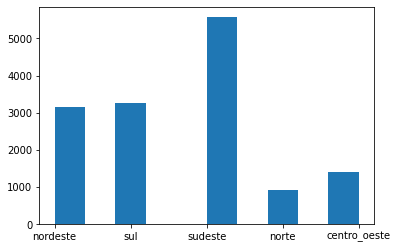

In [31]:
plt.hist(dados_homologados_cp1['REGIAO'])
plt.show()

In [32]:
regioes = dados_homologados_cp1['REGIAO'].value_counts()
regioes

sudeste         5565
sul             3266
nordeste        3164
centro_oeste    1417
norte            932
Name: REGIAO, dtype: int64

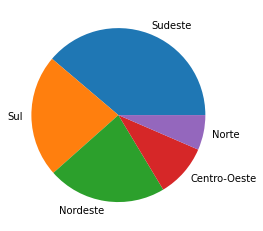

In [33]:

# create data: an array of values
# size_of_groups=[12,11,3,30]
labels = ['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte']

# Create a pieplot
plt.pie(regioes, labels=labels)
plt.show()

### Juntar os dataframes

In [34]:
dados_homologados_cp1.shape

(14344, 4)

In [35]:
dados_notasRespostas[dados_notasRespostas['INSCRICAO'] == '51801392508-5']

,INSCRICAO,ESPECIALIDADE,PRESENTE DIA1,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,Probabilidade e Estatística,...,Arquitetura e Organização de Computadores,Redes de Computadores,Computação Gráfica,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,ANO
56107,51801392508-5,inteligência computacional,N,Mestrado/Doutorado,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
56108,51801392508-5,engenharia de software,N,Mestrado/Doutorado,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
56109,51801392508-5,gestão da informação,N,Mestrado/Doutorado,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
56110,51801392508-5,inteligencia computacional,N,Mestrado/Doutorado,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
56111,51801392508-5,engenharia de software,N,Mestrado/Doutorado,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
56112,51801392508-5,sistemas embarcados,N,Mestrado/Doutorado,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
56113,51801392508-5,arquitetura de sistemas computacionais,N,Mestrado/Doutorado,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
56114,51801392508-5,modelagem computacional,N,Mestrado/Doutorado,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [36]:
# s = dados_notasRespostas['INSCRICAO'].drop_duplicates()
# s
# dados_candidatosNotas = dados_homologados.loc[~dados_homologados['INSCRICAO'].
#                                                  isin(dados_notasRespostas['INSCRICAO'])].reset_index(drop=True)

In [37]:
dados_homologados_cp1.info()
dados_homologados_cp1 = dados_homologados_cp1.drop(columns=['ANO'])

<class 'pandas.core.frame.DataFrame'>
Index: 14344 entries, 39401645886-1 to 51801366900-3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SEXO    14344 non-null  object
 1   ESTADO  14344 non-null  object
 2   ANO     14344 non-null  int64 
 3   REGIAO  14344 non-null  object
dtypes: int64(1), object(3)
memory usage: 560.3+ KB


In [38]:
# dados_respostas.info()
# dados_respostas = dados_respostas.drop(columns=['ANO'])

In [39]:
dados_notasRespostas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64246 entries, 0 to 64245
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   INSCRICAO                                        64246 non-null  object 
 1   ESPECIALIDADE                                    63372 non-null  object 
 2   PRESENTE DIA1                                    64246 non-null  object 
 3   CARGO                                            64246 non-null  object 
 4   Matemática Discreta                              52328 non-null  float64
 5   Cálculo Diferencial e Integral                   52328 non-null  float64
 6   Álgebra Linear                                   52328 non-null  float64
 7   Geometria Analítica                              52328 non-null  float64
 8   Análise Combinatória                             52328 non-null  float64
 9   Probabilidade e Estatística 

In [40]:
dataset_juntos = pd.merge(dados_homologados_cp1, dados_notasRespostas, how='inner', on='INSCRICAO')

In [41]:
dataset_juntos.shape

(62916, 33)

In [47]:
dataset_juntos = dataset_juntos.replace({'ESPECIALIDADE': especialidades_alt})

In [45]:
dataset_juntos = dataset_juntos.set_index('INSCRICAO')

KeyError: "None of ['INSCRICAO'] are in the columns"

In [49]:
dataset_juntos['ESPECIALIDADE'].unique()

array(['teoria da computação', 'metodologia e técnicas da computação',
       'sistemas de computação', 'visão computacional',
       'aprendizado de máquina',
       'lógica, inteligência artificial e métodos formais',
       'inteligência computacional', 'computação inteligente',
       'engenharia de software', 'inteligência artificial',
       'sistemas distribuídos e redes de computadores',
       'engenharia de software e sistemas de informação',
       'sistemas web e multimídia interativos',
       'sistemas distribuídos e programação concorrente',
       'modelagem e gerência de sistemas de informação',
       'informática na educação',
       'gerência de desenvolvimento de sistemas de informação',
       'métodos ágeis', 'desenvolvimento de sistemas web',
       'ciência computacional', 'sistemas de informação', nan,
       'computação gráfica, imagens e visualização',
       'aprendizado de máquina e mineração de dados', 'robótica',
       'visão computacional e robótica',


### Salvar os dados

In [50]:
dataset_juntos.to_csv('dados/dataset_poscomp.csv')

In [44]:
#dados_notasRespostas.to_csv('dados/notas_poscomp/dados_notasRespostas.csv')